In [265]:
!pip install kagglehub

In [266]:
#Import all relevant libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [268]:
folder_path = kagglehub.dataset_download("unsdsn/world-happiness")
files = os.listdir(folder_path)

In [269]:
#Read in the csv file and convert to a Pandas dataframe
os.listdir(folder_path)
dataframes = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path): 
        df = pd.read_csv(file_path)
        dataframes[file] = df

<h3>Load dataframes</h3>

In [271]:
df_2015 = dataframes[list(dataframes.keys())[0]]
df_2016 = dataframes[list(dataframes.keys())[1]]
df_2017 = dataframes[list(dataframes.keys())[2]]

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

<h3>Now we should see each year data frame:</h3>

In [274]:
df_2015.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
86,Serbia,Central and Eastern Europe,87,5.123,0.04864,0.92053,1.00964,0.74836,0.20107,0.02617,0.19231,2.02500
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854


In [275]:
df_2016.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,Sri Lanka,Southern Asia,117,4.415,4.322,4.508,0.97318,0.84783,0.62007,0.50817,0.07964,0.46978,0.91681
43,Venezuela,Latin America and Caribbean,44,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
88,Dominican Republic,Latin America and Caribbean,89,5.155,5.037,5.273,1.02787,0.99496,0.57669,0.52259,0.12372,0.21286,1.69626
108,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
76,Kosovo,Central and Eastern Europe,77,5.401,5.308,5.494,0.90145,0.66062,0.54000,0.14396,0.06547,0.27992,2.80998


In [276]:
df_2017.sample(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
68,Turkey,69,5.500,5.594865,5.405135,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278
143,Madagascar,144,3.644,3.714319,3.573681,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613
66,Belarus,67,5.569,5.646114,5.491885,1.156558,1.444945,0.637714,0.295400,0.155138,0.156314,1.723233
134,Niger,135,4.028,4.111947,3.944053,0.161925,0.993025,0.268505,0.363659,0.228674,0.138573,1.873983


In [277]:
#merged_df = pd.concat([df_2015,df_2016,df_2017], axis=1) # concat all dataframes on columns

In [278]:
print("df_2015 shape",df_2015.shape, "df_2016 shape",df_2016.shape, "df_2017 shape",df_2017.shape)

df_2015 shape (158, 12) df_2016 shape (157, 13) df_2017 shape (155, 12)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [280]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [281]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [282]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [283]:
df_2015.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,158,158,Switzerland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,158,10,Sub-Saharan Africa,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,158.0,NaN,NaN,NaN,79.493671,45.754363,1.0,40.25,79.5,118.75,158.0
Happiness Score,158.0,NaN,NaN,NaN,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587
Standard Error,158.0,NaN,NaN,NaN,0.047885,0.017146,0.01848,0.037268,0.04394,0.0523,0.13693
Economy (GDP per Capita),158.0,NaN,NaN,NaN,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.69042
Family,158.0,NaN,NaN,NaN,0.991046,0.272369,0.0,0.856823,1.02951,1.214405,1.40223
Health (Life Expectancy),158.0,NaN,NaN,NaN,0.630259,0.247078,0.0,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,NaN,NaN,NaN,0.428615,0.150693,0.0,0.32833,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,NaN,NaN,NaN,0.143422,0.120034,0.0,0.061675,0.10722,0.180255,0.55191


In [284]:
df_2016.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,157,157,Denmark,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,157,10,Sub-Saharan Africa,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,157.0,NaN,NaN,NaN,78.980892,45.46603,1.0,40.0,79.0,118.0,157.0
Happiness Score,157.0,NaN,NaN,NaN,5.382185,1.141674,2.905,4.404,5.314,6.269,7.526
Lower Confidence Interval,157.0,NaN,NaN,NaN,5.282395,1.148043,2.732,4.327,5.237,6.154,7.46
Upper Confidence Interval,157.0,NaN,NaN,NaN,5.481975,1.136493,3.078,4.465,5.419,6.434,7.669
Economy (GDP per Capita),157.0,NaN,NaN,NaN,0.95388,0.412595,0.0,0.67024,1.0278,1.27964,1.82427
Family,157.0,NaN,NaN,NaN,0.793621,0.266706,0.0,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,NaN,NaN,NaN,0.557619,0.229349,0.0,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,NaN,NaN,NaN,0.370994,0.145507,0.0,0.25748,0.39747,0.48453,0.60848


In [285]:
df_2017.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,155,155,Norway,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness.Rank,155.0,NaN,NaN,NaN,78.0,44.888751,1.0,39.5,78.0,116.5,155.0
Happiness.Score,155.0,NaN,NaN,NaN,5.354019,1.13123,2.693,4.5055,5.279,6.1015,7.537
Whisker.high,155.0,NaN,NaN,NaN,5.452326,1.118542,2.864884,4.608172,5.370032,6.1946,7.62203
Whisker.low,155.0,NaN,NaN,NaN,5.255713,1.14503,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,NaN,NaN,NaN,0.984718,0.420793,0.0,0.663371,1.064578,1.318027,1.870766
Family,155.0,NaN,NaN,NaN,1.188898,0.287263,0.0,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,NaN,NaN,NaN,0.551341,0.237073,0.0,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,NaN,NaN,NaN,0.408786,0.149997,0.0,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,NaN,NaN,NaN,0.246883,0.13478,0.0,0.154106,0.231538,0.323762,0.838075


In [286]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [287]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [288]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [292]:
# its taken from Gallup World Poll

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [294]:
# its taken from 2015 to 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


<em>the data collected from 2015 until 2017 shows a little inconsistencies such as:
<ul>
    <li>
       <em> data format:
           <ol>
               <li>
                   Number of columns are different in each data frame 
               </li>
               <li>
                   additional or less columns in each dataframe
               </li>
           </ol>
    </li>
</ul>

In [297]:
print("Number of columns in 2015 df:\n", len(df_2015.columns))
print("Number of columns in 2016 df:\n", len(df_2016.columns))
print("Number of columns in 2017 df:\n", len(df_2017.columns))

Number of columns in 2015 df:
 12
Number of columns in 2016 df:
 13
Number of columns in 2017 df:
 12


<h2> let us rename the identical columns thats differ from other dataframes</h2>
<em> as you can see above, df_2017 has similar columns to df_2015 and df_2016 but has a different names</em>

In [299]:
new_names={
    'Happiness.Rank':'Happiness Rank',
    'Happiness.Score':'Happiness Score',
    'Whisker.high':'Whisker high',
    'Whisker.low':'Whisker low',
    'Dystopia.Residual':'Dystopia Residual',
    'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
    'Health..Life.Expectancy.':'Health (Life Expectancy)',
    'Trust..Government.Corruption.':'Trust (Government Corruption)'
}
df_2017.rename(new_names, axis=1, inplace=True)

In [300]:
df_2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


<h3>
    as kaggle data card explained,
    the six happiness factors are:</h3>
    <ol>
        <li>Family</li>
        <li>GDP per Capita</li>
        <li>Life expectency</li>
        <li>Freedom</li>
        <li>Generosity</li>
        <li>Trust Government Corruption</li>
    </ol>
<em>Therefore, any other factor is not relevent to the study</em>

In [303]:
df_2015.drop(columns=['Region'],axis=1,inplace=True)
df_2016.drop(columns=['Lower Confidence Interval','Upper Confidence Interval','Region'],axis=1,inplace=True)
df_2017.drop(['Whisker high','Whisker low'],axis=1,inplace=True)

<h2>After we have dealed with inconsistencies and dropped unrelevent columns, we now will concat all 3 dataframes together and then deal with the missing values</h2>
<em>since there are some columns that are not in other dataframes and it is risky to remove these columns, we will use full outer join</em>

In [305]:
len(df_2015)

158

In [306]:
len(df_2016)

157

In [307]:
len(df_2017)

155

In [308]:
df_2015['Year_2015'] = '2015'
df_2016['Year_2016'] = '2016'
df_2017['Year_2017'] = '2017'

In [309]:
df_2015.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [310]:
merged_df = pd.merge(df_2015,df_2016,how='outer')
merged_df = pd.merge(merged_df,df_2017, how='outer')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [312]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015,Year_2016,Year_2017
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,NaN,NaN,2017
1,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN
2,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,NaN,2016,NaN
3,Albania,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015,NaN,NaN
4,Albania,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,NaN,NaN,2017


In [313]:
merged_df.duplicated().sum()

0

In [314]:
merged_df.isnull().sum()

Country                            0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   312
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year_2015                        312
Year_2016                        313
Year_2017                        315
dtype: int64

In [315]:
merged_df[merged_df.duplicated()]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015,Year_2016,Year_2017


In [316]:
# there are no duplicated rows

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [318]:
#Display number missing values per column
merged_df.isnull().sum().sort_values(ascending = False)

Year_2017                        315
Year_2016                        313
Standard Error                   312
Year_2015                        312
Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
dtype: int64

<p>We will use an imputation with a constant value for the following reasons:</p>
<ol>
    <li>Year null values has no effect on result if we replace missing values with a constant since each row has its own information with the relevant year</li>
    <li>Standard Error is not one of the six happiness factors so if we replace missing values with a constant, it does not effect on result</li>
</ol>

In [320]:
# go to clean data

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [322]:
# check columns types 

In [323]:
# go to clean them 

In [324]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


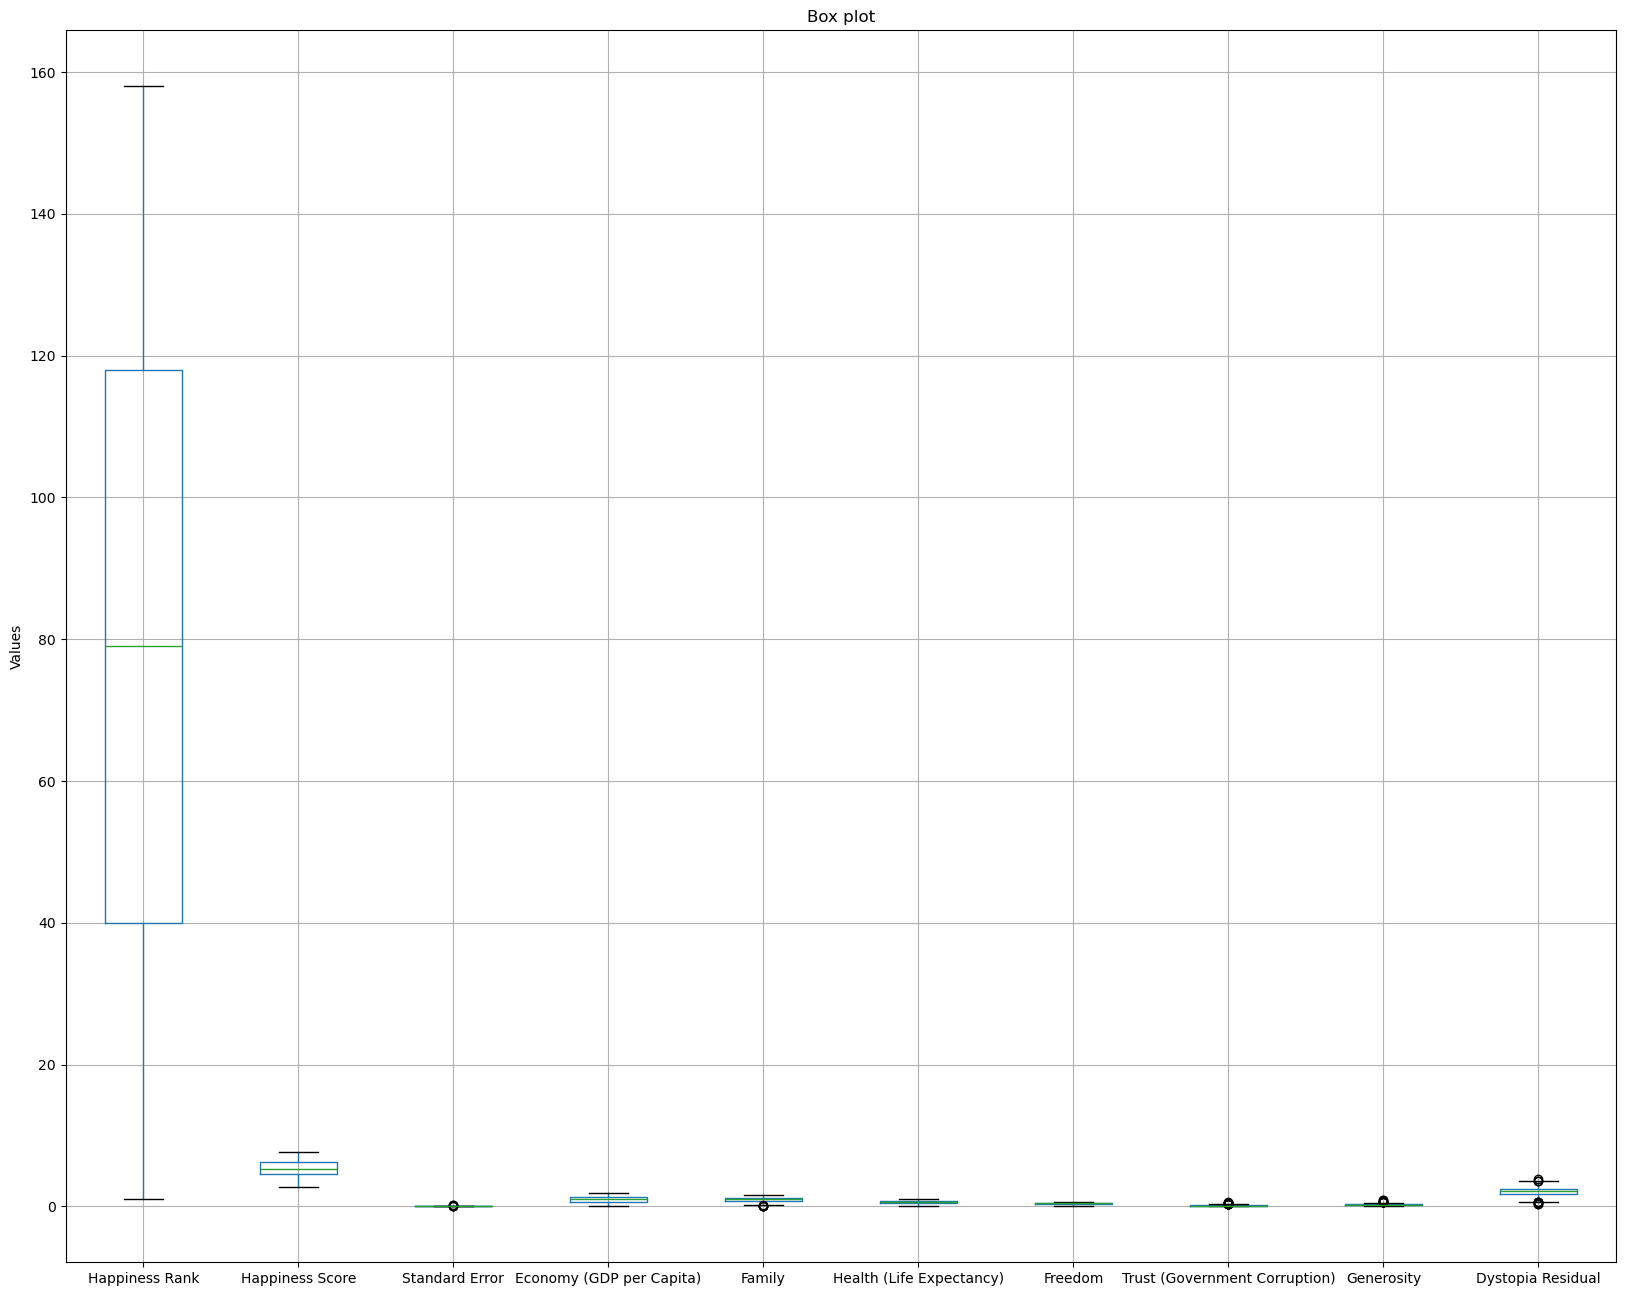

In [433]:
# Box plot to visualize outliers
plt.figure(figsize=(20, 16))
merged_df.boxplot()
plt.title('Box plot')
plt.ylabel('Values')
plt.show()

In [326]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [327]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [328]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [332]:
merged_df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year_2015                         object
Year_2016                         object
Year_2017                         object
dtype: object

In [379]:
# combine the year columns into a new 'year' column
merged_df['Year'] = merged_df[['Year_2015', 'Year_2016', 'Year_2017']].bfill(axis=1).iloc[:, 0]

In [385]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015,Year_2016,Year_2017,Year
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,NaN,NaN,2017,2017
1,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN,2015
2,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,NaN,2016,NaN,2016
3,Albania,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015,NaN,NaN,2015
4,Albania,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,NaN,NaN,2017,2017


In [387]:
merged_df.drop(['Year_2015','Year_2016','Year_2017'],axis=1,inplace=True)

In [389]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017
1,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015
2,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016
3,Albania,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015
4,Albania,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,2017


In [415]:
mask = merged_df['Standard Error'].isnull()
merged_df[mask]

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017
2,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016
4,Albania,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,2017
5,Albania,109,4.655,NaN,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160,2016
6,Algeria,38,6.355,NaN,1.052660,0.833090,0.618040,0.210060,0.161570,0.070440,3.409040,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
463,Yemen,147,3.724,NaN,0.579390,0.474930,0.310480,0.228700,0.058920,0.098210,1.972950,2016
465,Zambia,106,4.795,NaN,0.612020,0.637600,0.235730,0.426620,0.114790,0.178660,2.589910,2016
466,Zambia,116,4.514,NaN,0.636407,1.003187,0.257836,0.461603,0.078214,0.249580,1.826705,2017
468,Zimbabwe,131,4.193,NaN,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,2016


In [423]:
merged_df['Standard Error'].fillna(0,inplace=True)

C:\Users\Ghada\AppData\Local\Temp\ipykernel_7104\3037722674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Standard Error'].fillna(0,inplace=True)


In [427]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,141,3.794,0.00000,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017
1,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015
2,Afghanistan,154,3.360,0.00000,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016
3,Albania,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015
4,Albania,109,4.644,0.00000,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,2017


In [63]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [65]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.